In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.shape

(167, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
countries = df['country']

In [8]:
countries

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [9]:
df =df.drop('country', axis = 1)

In [10]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = scaler.fit_transform(df)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

df = pca.fit_transform(df)

C:\Users\adpub\AppData\Local\Temp\ipykernel_20752\4204681118.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df[:,0], df[:,1], cmap='rainbow')


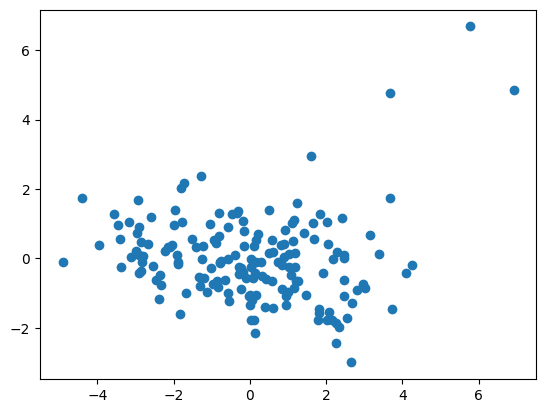

In [ ]:
# Before clustering
plt.scatter(df[:,0], df[:,1], cmap='rainbow')

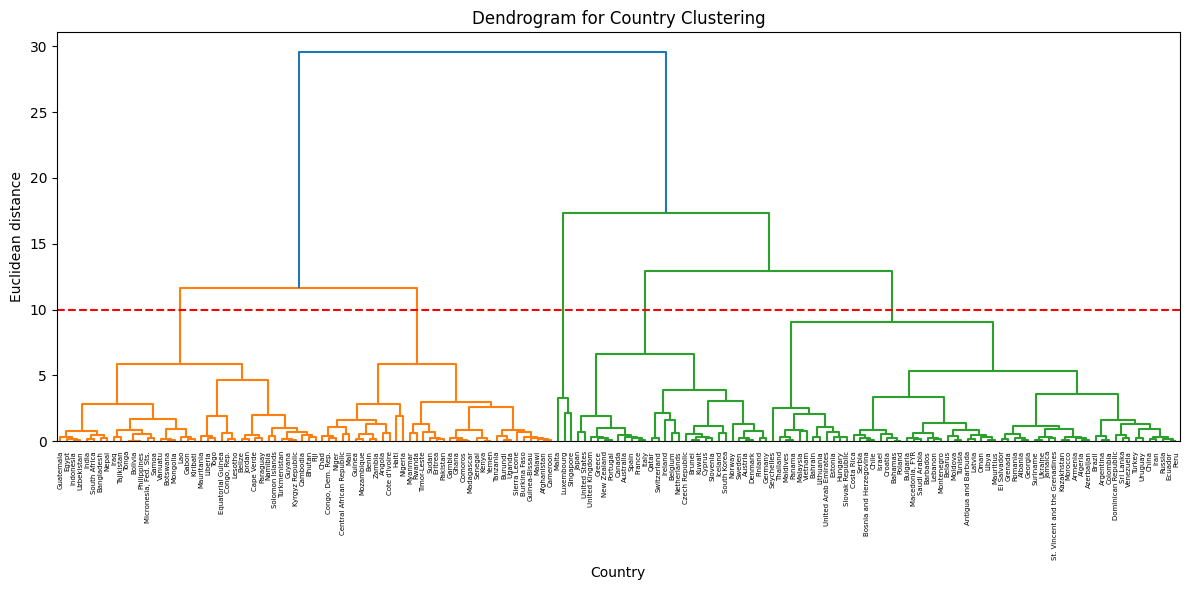

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(df, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=countries.values, leaf_rotation=90)
plt.title('Dendrogram for Country Clustering')
plt.xlabel('Country')
plt.ylabel('Euclidean distance')
plt.tight_layout()
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

In [14]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters = model.fit_predict(df)

In [15]:
clusters

array([0, 1, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 0, 1, 1, 3, 0, 0, 0, 0, 1, 0,
       1, 3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 3,
       3, 1, 1, 0, 1, 0, 0, 1, 0, 3, 3, 0, 0, 1, 3, 0, 3, 1, 0, 0, 0, 0,
       0, 1, 3, 0, 0, 1, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 3, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       3, 3, 0, 0, 3, 1, 0, 1, 0, 1, 0, 1, 3, 3, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 3, 0, 0, 3, 3, 1, 1, 0, 1, 3, 3, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 3, 3, 1, 0, 0, 1, 1, 0, 0])

Text(0, 0.5, 'PCA 2')

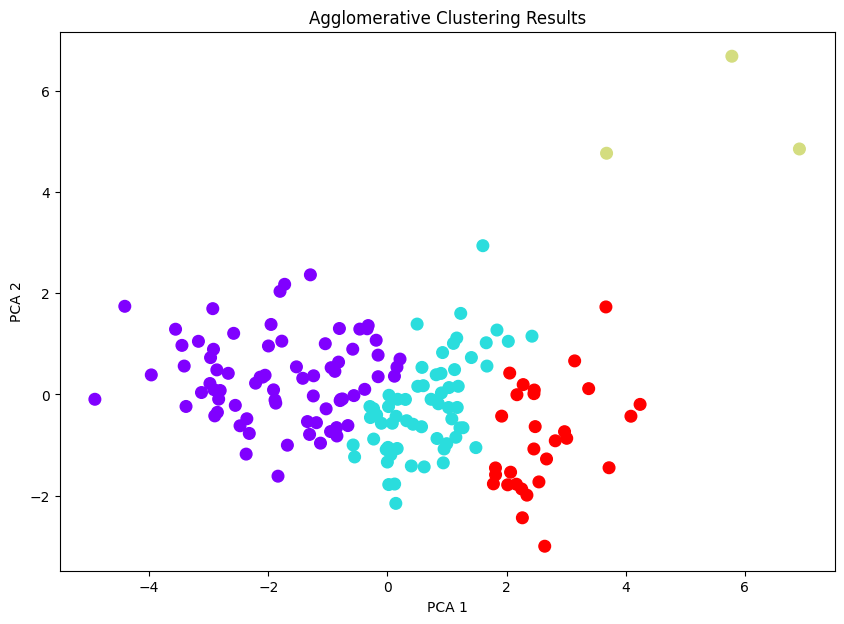

In [33]:
plt.figure(figsize=(10, 7))
plt.scatter(df[:, 0], df[:, 1], c=clusters, cmap='rainbow', s=70)
plt.title('Agglomerative Clustering Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')